# Portfolio assignment week 6
#### Author: Karina Diaz

## 1. Decision Trees and Naive bayes
The scikit-learn library provides different parameters for decision trees and naive bayes. 

Based on the last code example [in the accompanying notebook](https://github.com/fenna/BFVM23DATASCNC5/blob/main/Exercises/E_DT_NB.ipynb), add several new models to the `classifiers` variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay 
from matplotlib.colors import ListedColormap


# libraries needed for the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier



In [2]:
# Loading moons and cicles dataset
datasets = [make_moons(), make_circles()]

# Understanding the datasets
X_moons, y_moons = make_moons()
print('moons shape',X_moons.shape) 
X_circles, y_circles =  make_circles()
print('circles shape',X_circles.shape)



moons shape (100, 2)
circles shape (100, 2)


In [3]:
# Giving names to the models
names = ["Decision Tree - depth None",
         "Decision Tree -  depth 1 min, leafs 1",
         "Decision Tree -  depth 1 min,  leafs 8",
         "Decision Tree -  depth 2 min,  leafs 1",
         "Decision Tree -  depth 2 min,  leafs 8",
         "Decision Tree -  depth 5 min,  leafs 1",
         "Decision Tree -  depth 5 min,  leafs 8",
         "Decision Tree -  depth 10 min,  leafs 1",
         "Decision Tree -  depth 10 min,  leafs 8",
         "Gaussian Naive Bayes",
         "Bernoulli Naive Bayes no smoothing",
         "Bernoulli Naive Bayes smoothing"]

# Models that are going to be tested 
# Decision Tree and Naive Bayes options

classifiers = [DecisionTreeClassifier(max_depth=None),
               DecisionTreeClassifier(max_depth=1, min_samples_leaf= 1),
               DecisionTreeClassifier(max_depth=1, min_samples_leaf= 8),
               DecisionTreeClassifier(max_depth=2, min_samples_leaf= 1),
               DecisionTreeClassifier(max_depth=2, min_samples_leaf= 8),
               DecisionTreeClassifier(max_depth=5, min_samples_leaf= 1),
               DecisionTreeClassifier(max_depth=5, min_samples_leaf= 8),
               DecisionTreeClassifier(max_depth=10, min_samples_leaf= 1),
               DecisionTreeClassifier(max_depth=10, min_samples_leaf= 8),
               GaussianNB(),
               BernoulliNB(alpha=1.0e-10),
               BernoulliNB(alpha=1)]



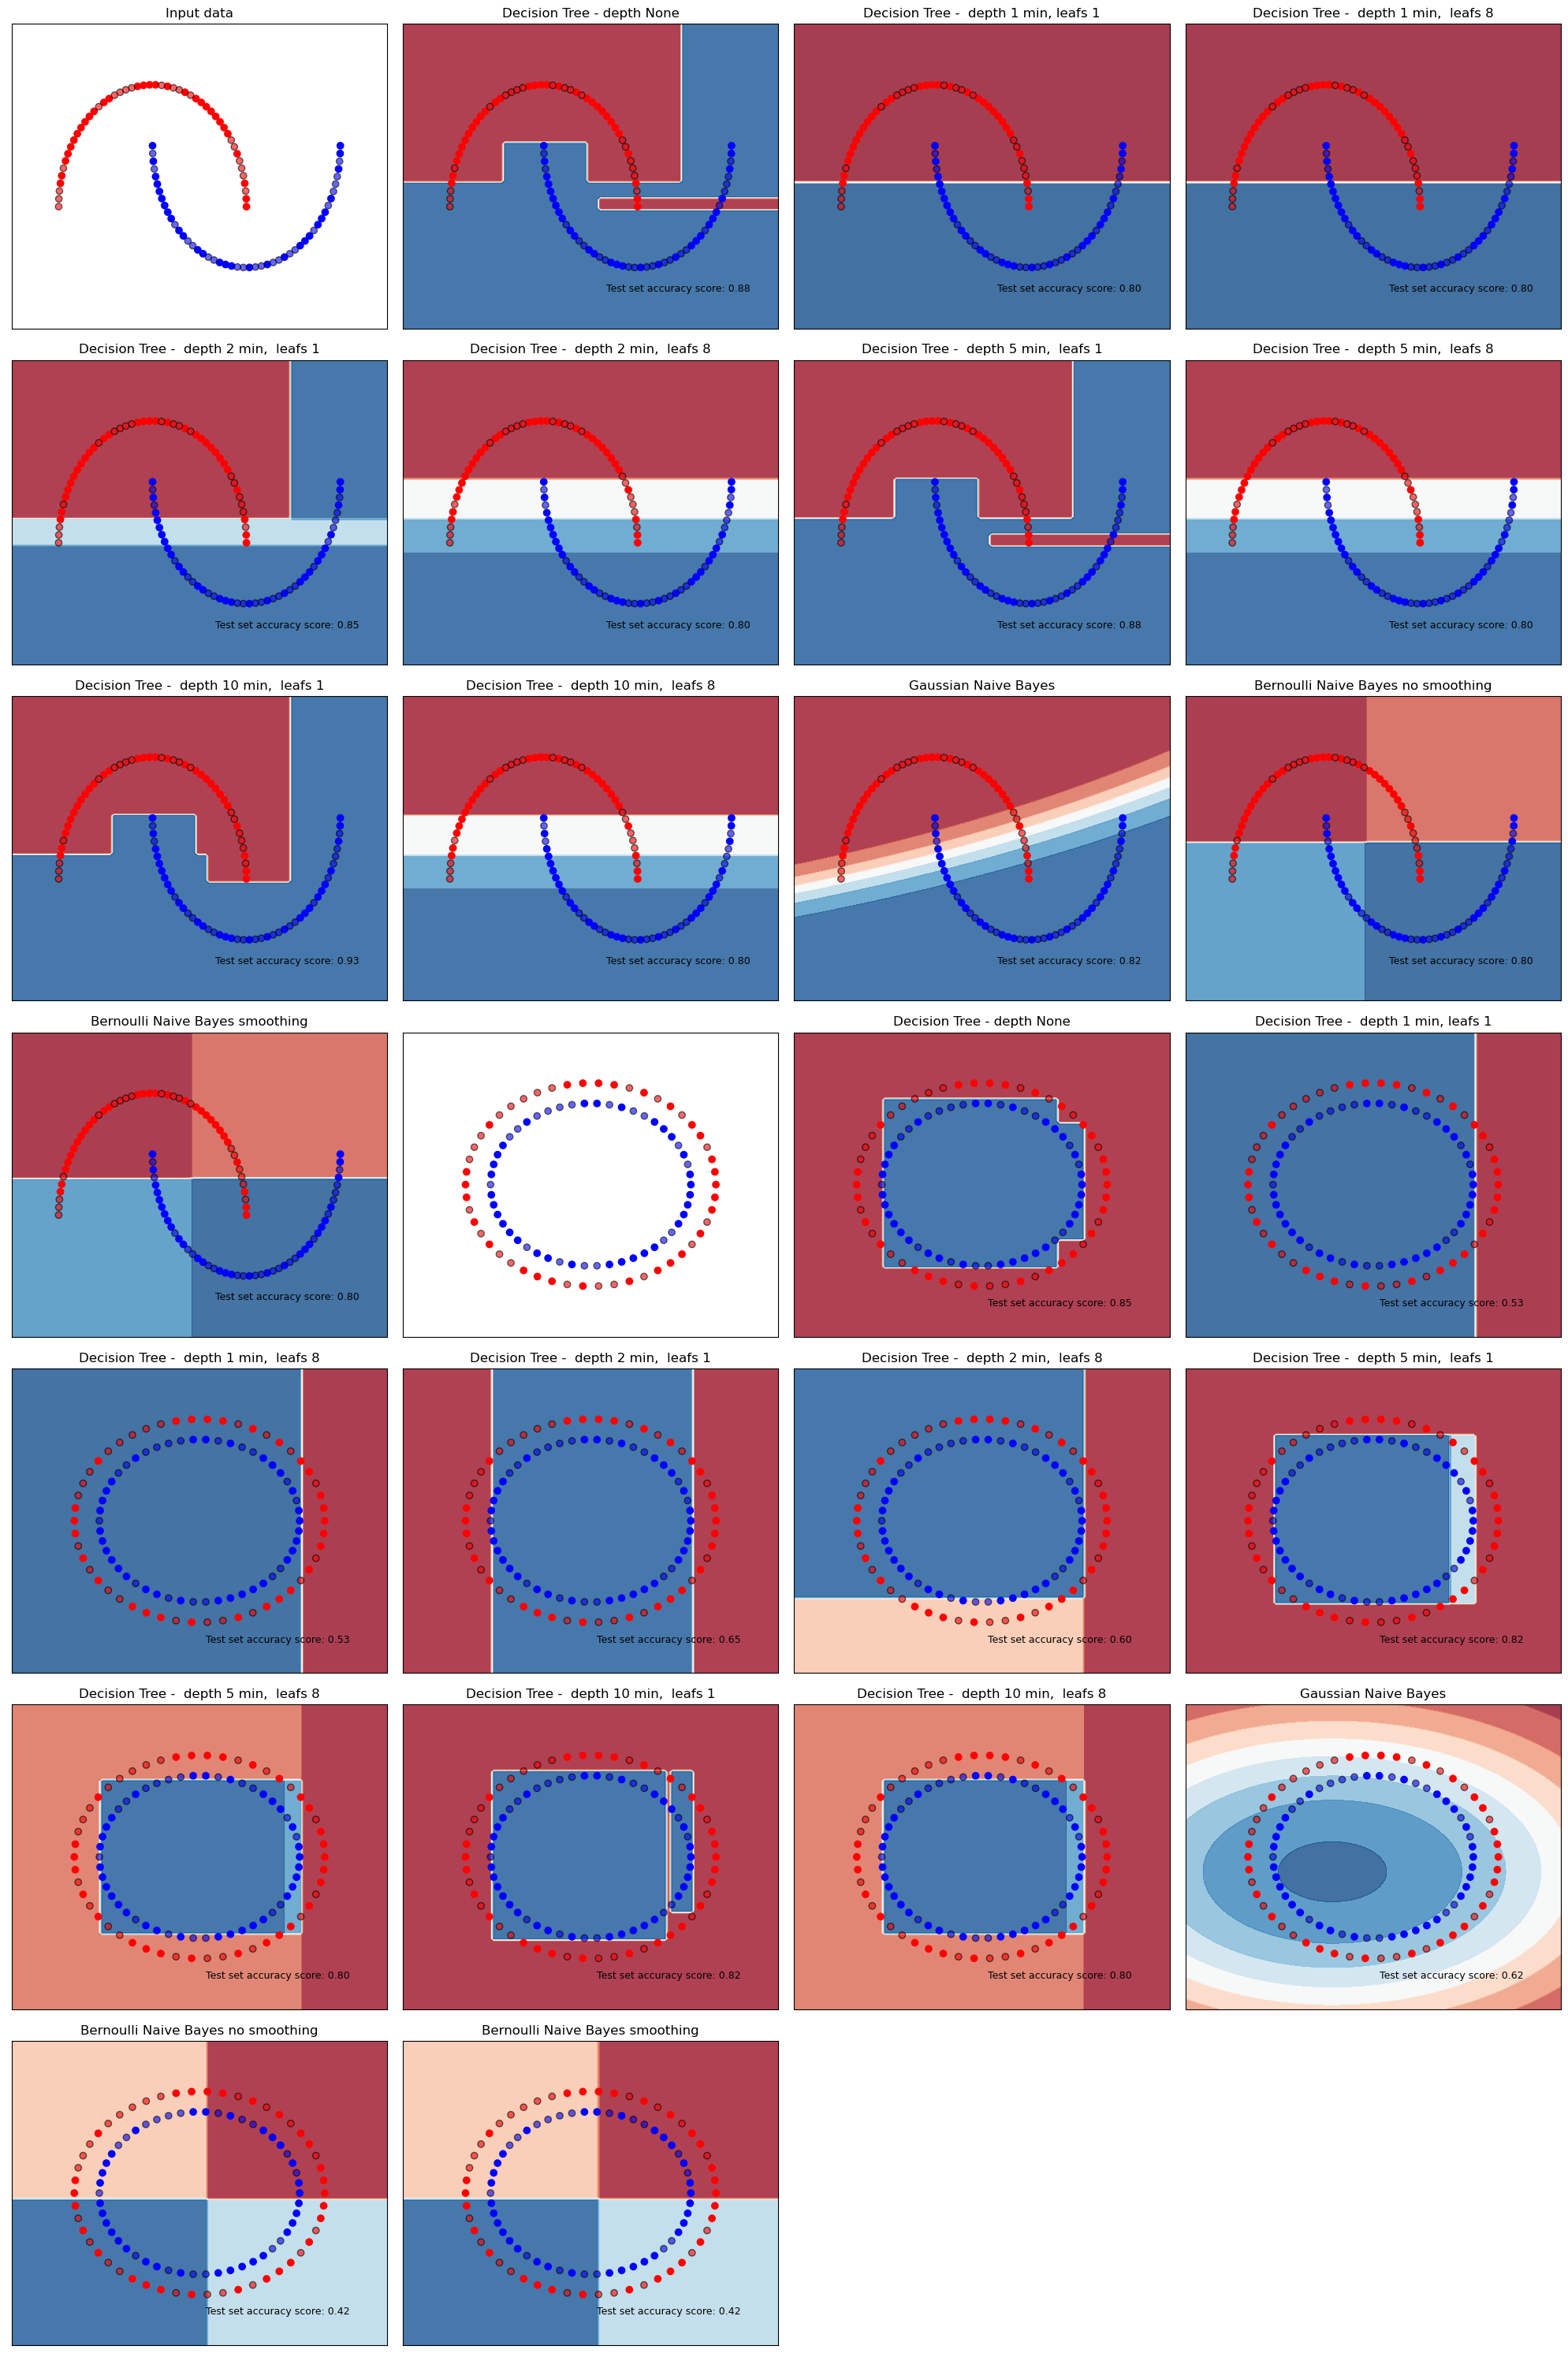

In [4]:
# The next code to plot the classifers was modified from:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Setting up the figure boundaries
figure = plt.figure(figsize=(20, 30))
i = 1

# iterate over moons and cicles datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    # Splitting the tests
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(7,4 , i)

    #plot original dataset
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    
    #plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(7,4,i)
        
        # make pipeline to scales and fit the datasets
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test) # getting the score

        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
        
        # plot training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

        # plot testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors="k",alpha=0.6)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3,
                ("Test set accuracy score: %.2f" % score).lstrip("0"),
                size=9,horizontalalignment="right")
        i += 1
plt.tight_layout()
plt.show()

### Analysis
In the plot we see how the different dataset were classified. We have the blue and the red point in the moons and cicles data set. 

* *Training points* are in *solid* colors, *no edge*.    
* *Testing points* are *semi-transparent* and with a *black edge*.
  
In the case of the Decision Trees, they make very few assumptions about the training data.   
Decision trees are **nonparametric models**, that is that **if left unconstrained** (prior to training), the tree structure will adapt itself to the training data, fitting it very closely, and most likely **overfitting** it.   
  
We can see this behaviour when comparing the *'Decision Tree - depth None'* with the other Decision Trees with different depths. The **data overfitting** is clearer in the **cicles data set**, as it get a really **high accuracy score (0.88)**. If we look closer to the plot and the way the canvas colors are distributed in order to match the points classes we can definitly say that the data is overfitted. This also happens in the **moons data set depth None (test accuracy score = 1)**  
'max_depth = None' means unlimited.  
    
In order to avoid overfitting the parameters need to be tuned. I decided to play with the *maximum depth* of the tree and the *min samples leafs*. 'The deeper the tree, the more complex the decision rules and the fitter the model'. 
  
------------ 
Best Decision Trees models:
* Moons: **'depth 5, min leafs 1'** (test accuracy score = 1) and **'depth 5, min leafs 1'** (test accuracy score = 1).  
  
The 'min_samples_leaf' represents the minimum number of samples required to be at a leaf node. All the models in which the min leafs were > 1 presented a weird classifiying behaviour and they tried to adapt better to the model. This paramater should vary depending on the type of data.  
The 'depth' represents the maximum depth of the tree. That is how much nodes will be expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. So this parameter is really important. 
* Cicles: **'depth 5, min leafs 1'** (test accuracy score = 0.90) follow by **'depth None** (test accuracy score = 0.88).  
    
In this case we can clearly see an example of overfitting the data with the depth None as the background colors are so weirdly distributed compared with the depth 5, min leafs 1 which shows a more natural classification. 


-------
Naive bayes models: 
* Moons: **'Gaussian Naive Bayes'** (test accuracy score = 0.95).
Although 'Gaussian Naive Bayes' and 'Bernoulli Naive Bayes' have very similar scores (a difference of 0.02).  
In between smoothing and no smoothing visually I don't see much difference, nor the accuracy scores are different. 
  
* Cicles: **'Gaussian Naive Bayes'** (test accuracy score = 0.57). 
'Gaussian Naive Bayes' and 'Bernoulli Naive Bayes' have very similar scores (a difference of 0.12), but non of the Naive Bayes models fit really well the data.  
  
Bernoulli Naive bayes is good at handling boolean/binary attributes. That is why in the circle dataset, in the background colors we see 2 very well defined colors, compared with the Gaussian Naive Bayes.  
On the other side Gaussian naive bayes is good at handling continuous values, it assumes that the likelihood of the features is Gaussian, like the ones in the moons and circle data sets.  

### References
https://scikit-learn.org/stable/modules/tree.html#tree
https://scikit-learn.org/stable/modules/tree.html#tree-classification
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB 
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB  
*GeÌ ron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.*



## 2. Decision Tree Evaluation
As shown in the [in the accompanying notebook](https://github.com/fenna/BFVM23DATASCNC5/blob/main/Exercises/E_DT_NB.ipynb) it is possible to visualize the decision tree. 

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which you can find on assemblix2019 (`/data/datasets/DS3/`). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. Evaluation
7. **Explanation**

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?



In [5]:
# Loading and preprocessing the data
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score




### Loading the data

In [6]:
# Defining a function to get the config file
def get_config():
    '''Setting the config file'''
    with open("config_DS3.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config



In [7]:
config = get_config()
cancer_path = (config['breast_cancer'])
cancer_path

# Creating a data frame with the data
cancer_df = pd.read_csv(cancer_path)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory analysis

#### Highlights 

* The data consist of **569 observations** and **32** columns or **features**.
* Samples:  
     - **[B]enign**: 357  
     - **[M]alignat**: 212
* The data types are correct.
* A non informative column is dropped.
* There is no missing data.
* `diagnosis` was converted into numercical values for a better classification. **M == 1**,  **B == 0**
* The raw data is not normalised

In [8]:
print('Data shape: ', cancer_df.shape)
print(cancer_df.info())

Data shape:  (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  per

In [9]:
cancer_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# Checking how the data is divided
print(cancer_df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [11]:
# drop the not needed column, in this case is the Id one 
cancer_df.drop('id', axis=1, inplace = True)

In [12]:
# convert the diagnosis columns into numerical values rather than strings
# convert the M (malignat) to 1 and B (benign) to 0
cancer_df.replace({'M': 1, 'B': 0}, inplace=True)
print(cancer_df['diagnosis'].value_counts())


0    357
1    212
Name: diagnosis, dtype: int64


In [13]:
#check for missing data
missing = cancer_df.isnull().sum()
print('-> Missing data in:', missing[missing > 0])
# There is no missing data
print('-'*50)

# Check which columns are present on the dataframe
print('Features:', cancer_df.columns)

-> Missing data in: Series([], dtype: int64)
--------------------------------------------------
Features: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Preprocess data

In [14]:
# Checking for skewness. I kept the columns that have a skew above .75 
skew_columns = (cancer_df.skew(numeric_only=True).sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [15]:
# Performing log transform on skew columns
for col in skew_columns.index.tolist():
    cancer_df[col] = np.log1p(cancer_df[col])

Testing for normality

* Null hypothesis = that the data was drawn from a normal distribution.
* Alternative hypothesis = the data was not drawn from a normal distribution.


In [16]:
res, pvalue = normaltest(cancer_df.select_dtypes(include=np.number))
print(pvalue < 0.05)
print('Number of samples with p val <0.05:', (pvalue < 0.05).sum())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Number of samples with p val <0.05: 31


All the p-values are “small” (<0.05).  

The alternative hypothesis is accepted: **the weights were not drawn from a normal distribution**. Therefore, the data needs to be scaled. I will perfom this in the following steps, when fitting the model.

In [17]:
# Creating the high dimensional feature space X needed for the modeling part
# I remove the diagnosis column
X = cancer_df.iloc[:, 1:]
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.943913,10.38,4.818667,6.909753,0.11840,0.244983,0.262441,0.137237,0.2419,0.075766,...,3.272606,17.33,5.223594,7.610853,0.1622,0.510185,0.537604,0.2654,0.378505,0.112346
1,3.071303,17.77,4.897093,7.190676,0.08474,0.075701,0.083330,0.067818,0.1812,0.055122,...,3.257712,23.41,5.073923,7.579168,0.1238,0.171092,0.216401,0.1860,0.242946,0.085278
2,3.029650,21.25,4.875197,7.093405,0.10960,0.148334,0.180153,0.120357,0.2069,0.058259,...,3.201526,25.53,5.033701,7.444249,0.1444,0.353821,0.371839,0.2430,0.308440,0.083955


In [18]:
# creating a vector with the tags of the disease
data_labels = cancer_df['diagnosis'].values
print(data_labels[:40])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1]


In [19]:
# Splitting the data into training set and test set
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    data_labels,
                                                    test_size=0.2)

print(X_train.shape, X_test.shape,
      y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### **Modeling and evaluation**



X --> clinical values

y -->  diagnosis values  



##### 0. Defining the functions needed for the modeling

In [20]:
# Function to plot the tree
def tree_graph(decison_tree_model):
    '''Function to plot the resulting tree obtained by the DecisionForestClassifier
    Arguments:
        decision_tree_model: information of the tree obtanied from the clasiffier
    Returns:
        the plot of the tree
        '''
    plt.figure(figsize=(20, 10))
    tree.plot_tree(
        decison_tree_model, 
        # Converting the column names to list
        feature_names=X_test.columns.to_list(),
        # Converting the cancer status to list 
        class_names=np.unique(y_test).astype(str).tolist(),
        filled=True,
        rounded=True)
    plt.show()


In [21]:
def evaluation_results(y_test, y_pred, y_score):
    '''Function to perform the different evaluation test of the classifiers 
    analysed
    Arguments 
        y_test: test data set (20% of the original data). Contains the 
        labels of the cancer status.
        y_pred: Predicted labels after training the model
        y_score: Predicted confidence scores for samples predicted
    Returns
        Classifiaction report, Roc auc score (AUC) and Mean average precision 
        score (mAP). As well as the plots of the confusion Matrix, 
        ROC-AUC curve and Precision-Recall Curve'''
    
    #M (malignat) to 1 and B (benign) to 0
    target_names = ['Bening', 'Malignant']

    #1.- Classifiaction report 
    print('Classification report - Test data')
    print(classification_report(y_test, y_pred,target_names=target_names))

    # 2.- Confussion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=target_names)

    #3.- Roc auc 
    # pos label: {negative, positive} --> {0,1}
    # I am more interested in the persons that were predicted to have cancer 
    # rather than the ones that were predicted as benign. So positive label is 1.
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='SVC')

    #4.- Precision recall curve
    prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
    ap = average_precision_score(y_test, y_score)
    pre_display = PrecisionRecallDisplay(precision=prec, recall=recall,
                                        average_precision=ap,
                                        estimator_name="LinearSVC")


    print(f'Roc auc score (AUC): {roc_auc}') 
    print(f'Mean average precision score (mAP): {ap}')


    ## plotting the results
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(f'Model Evaluation')
    cm_display.plot(ax=ax1)
    ax1.set_title('Confusion Matrix')
    roc_display.plot(ax=ax2)
    ax2.set_title('ROC Curve')
    pre_display.plot(ax=ax3)
    ax3.set_title('Precision-Recall Curve')
    plt.show()

##### 1. Modeling Decision Tree classifiers

In [22]:
# Giving names to the models
names = ["Decision Tree - depth None",
         "Decision Tree -  depth 1",
         "Decision Tree -  depth 2",
         "Decision Tree -  depth 3",
         "Decision Tree -  depth 4",
         "Decision Tree -  depth 5",
         "Decision Tree -  depth 6",
         "Decision Tree -  depth 7",
         "Decision Tree -  depth 8",
         "Decision Tree -  depth 9",
         "Decision Tree -  depth 10"]

# Models that are going to be tested 
classifiers = [DecisionTreeClassifier(max_depth=None),
               DecisionTreeClassifier(max_depth=1),
               DecisionTreeClassifier(max_depth=2),
               DecisionTreeClassifier(max_depth=3),
               DecisionTreeClassifier(max_depth=4),
               DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=6),
               DecisionTreeClassifier(max_depth=7),
               DecisionTreeClassifier(max_depth=8),
               DecisionTreeClassifier(max_depth=9),
               DecisionTreeClassifier(max_depth=10)]


Decision Tree - depth None
Accuracy score: 0.9298245614035088


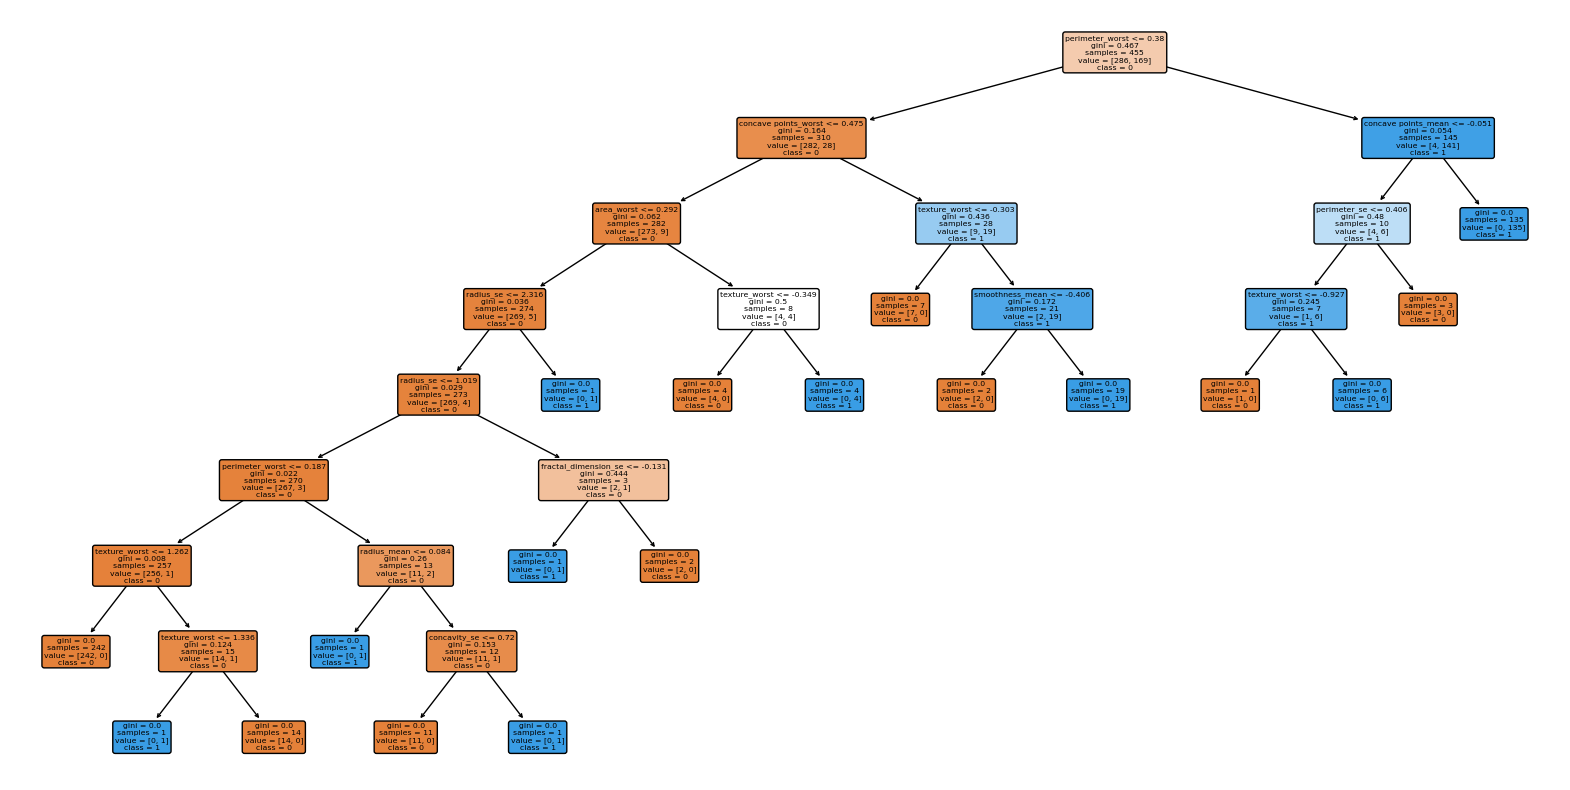

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.92      0.97      0.95        71
   Malignant       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Roc auc score (AUC): 0.9161480510972814
Mean average precision score (mAP): 0.8689702790069987


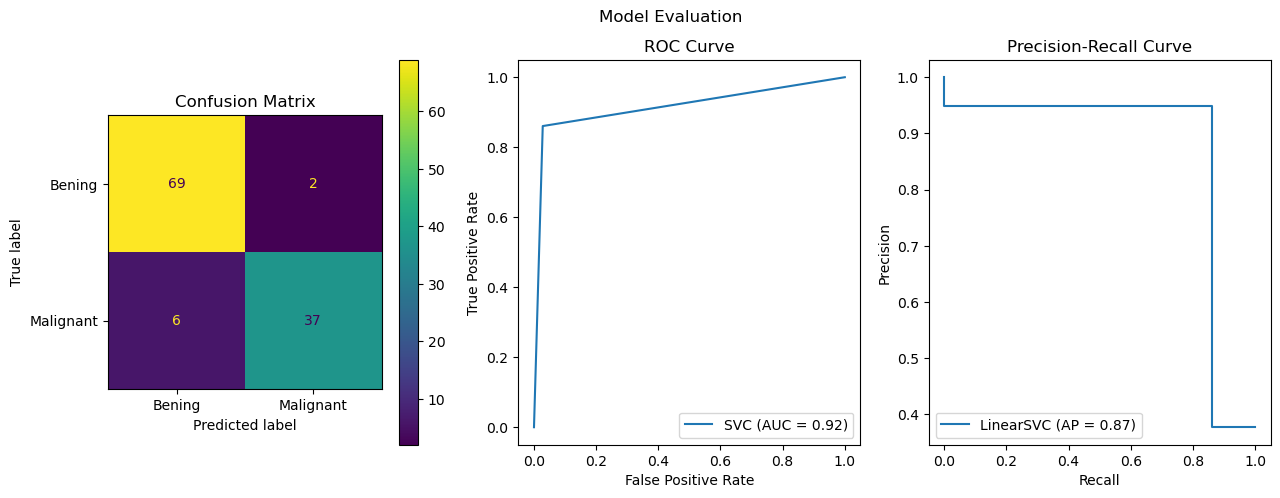

Decision Tree -  depth 1
Accuracy score: 0.8771929824561403


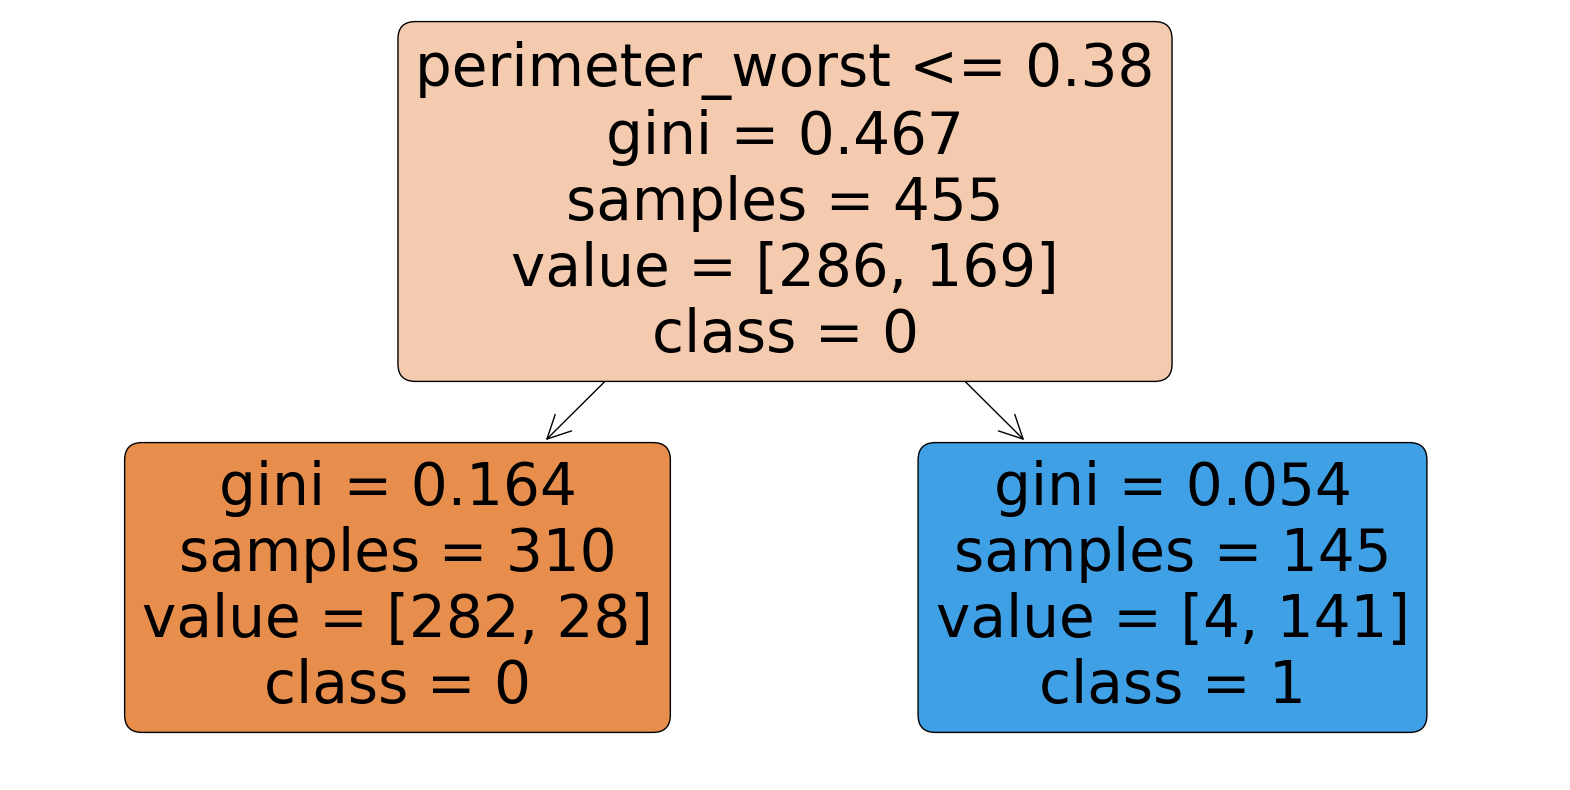

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.84      0.99      0.91        71
   Malignant       0.97      0.70      0.81        43

    accuracy                           0.88       114
   macro avg       0.91      0.84      0.86       114
weighted avg       0.89      0.88      0.87       114

Roc auc score (AUC): 0.8417949557811988
Mean average precision score (mAP): 0.7892038799173479


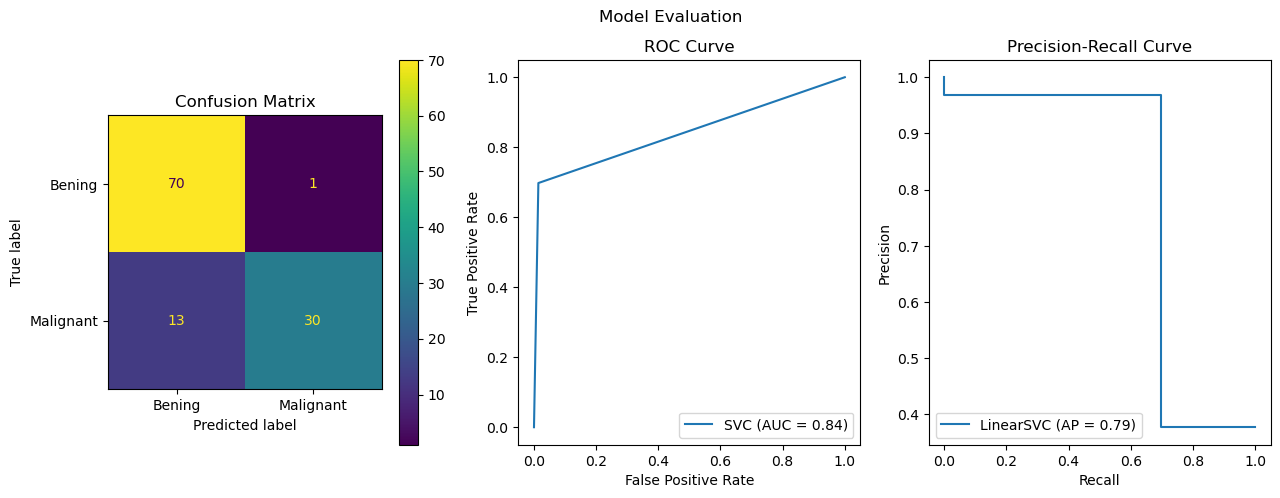

Decision Tree -  depth 2
Accuracy score: 0.9210526315789473


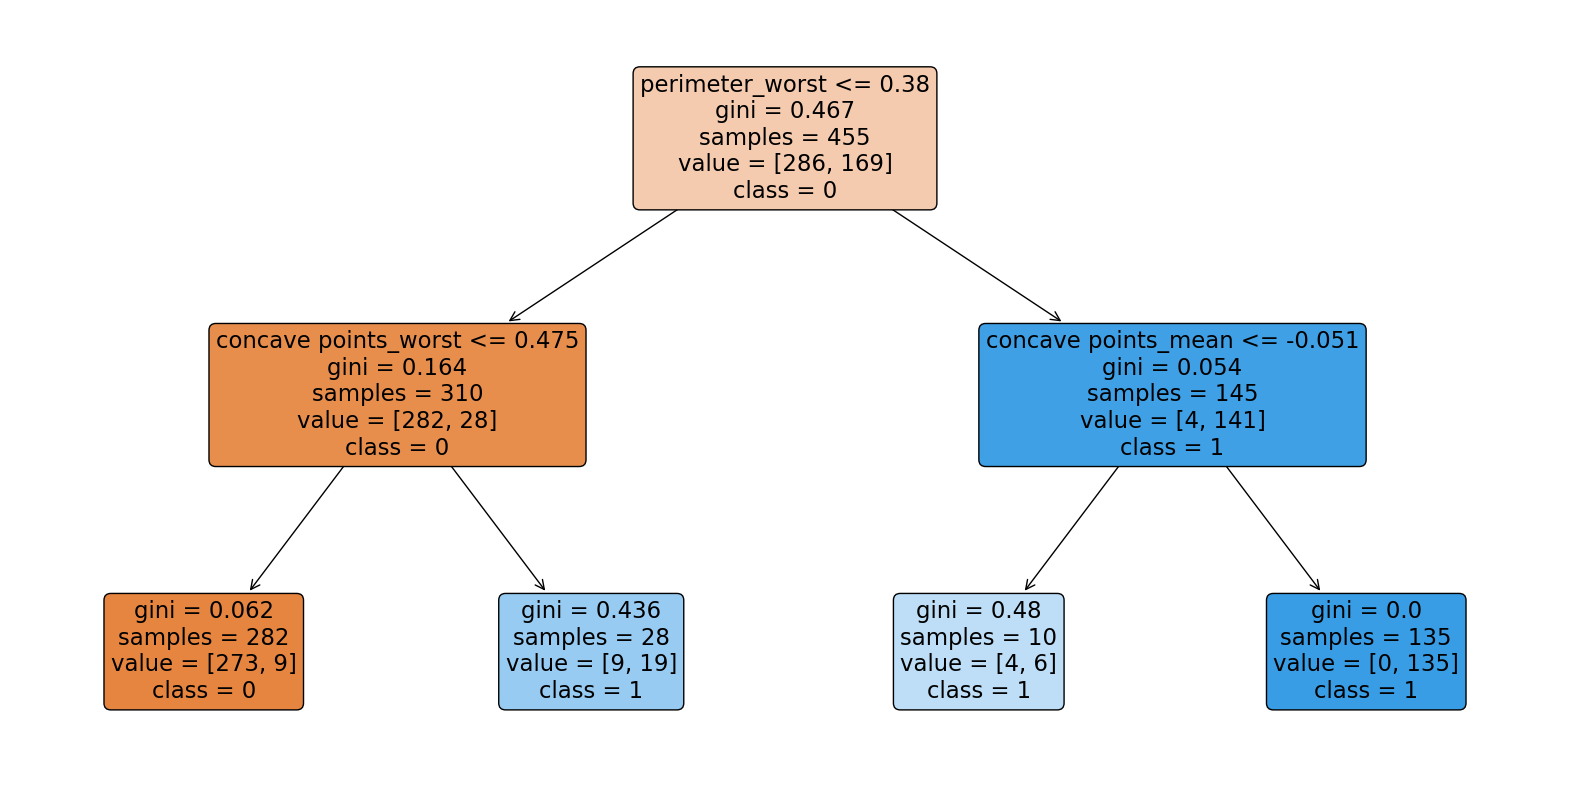

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.90      0.99      0.94        71
   Malignant       0.97      0.81      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114

Roc auc score (AUC): 0.8989518506387161
Mean average precision score (mAP): 0.8576800528452916


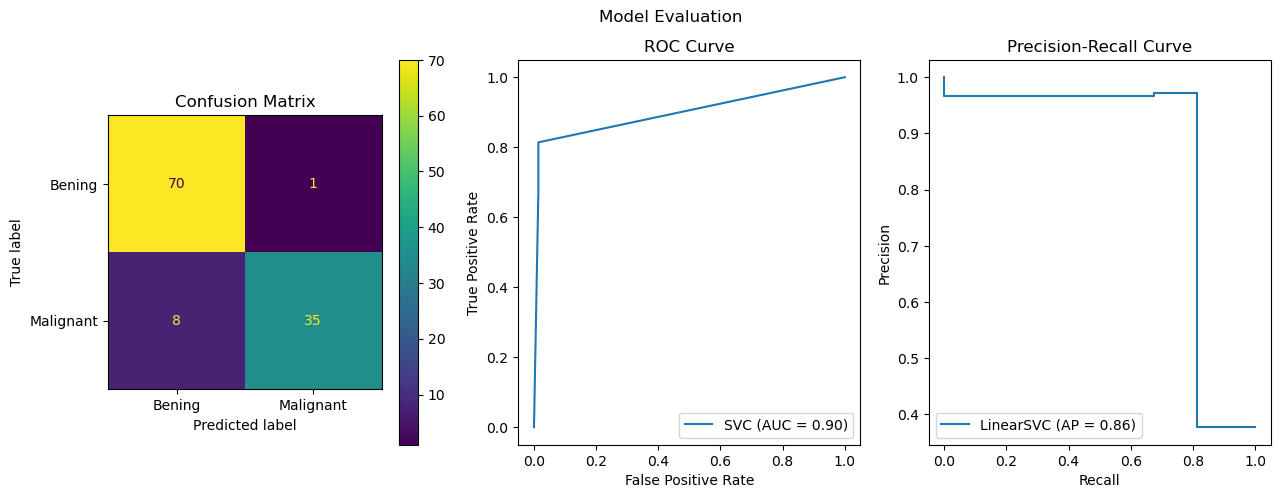

Decision Tree -  depth 3
Accuracy score: 0.9122807017543859


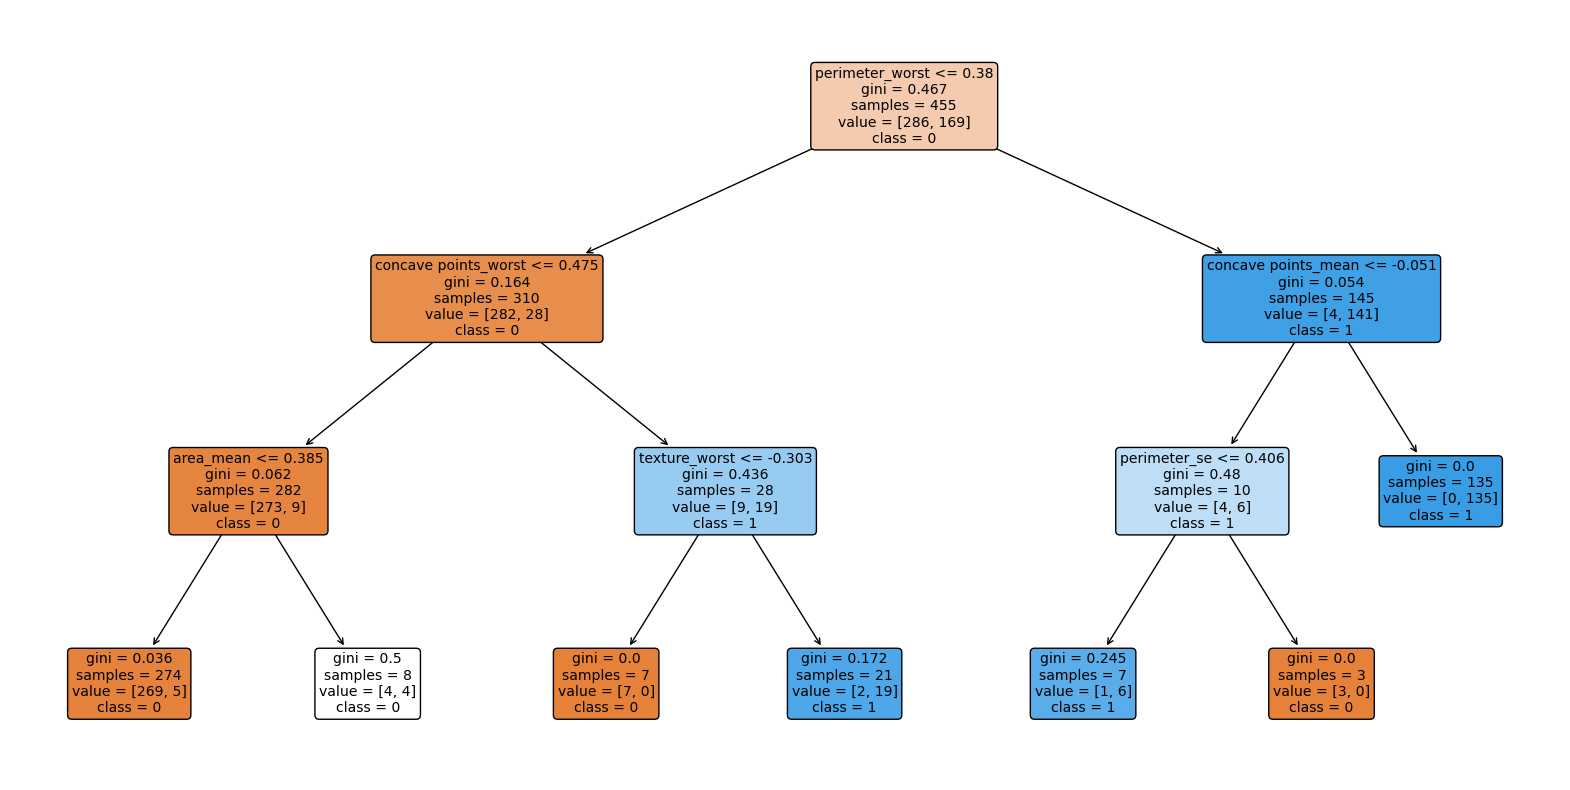

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.89      0.99      0.93        71
   Malignant       0.97      0.79      0.87        43

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114

Roc auc score (AUC): 0.8963314772355062
Mean average precision score (mAP): 0.8683848876772927


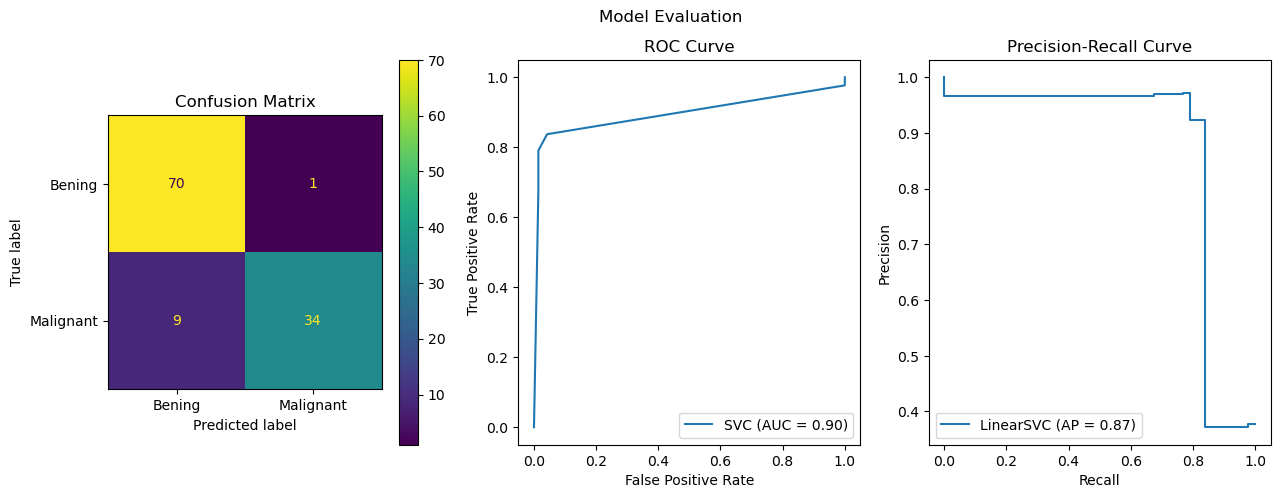

Decision Tree -  depth 4
Accuracy score: 0.9298245614035088


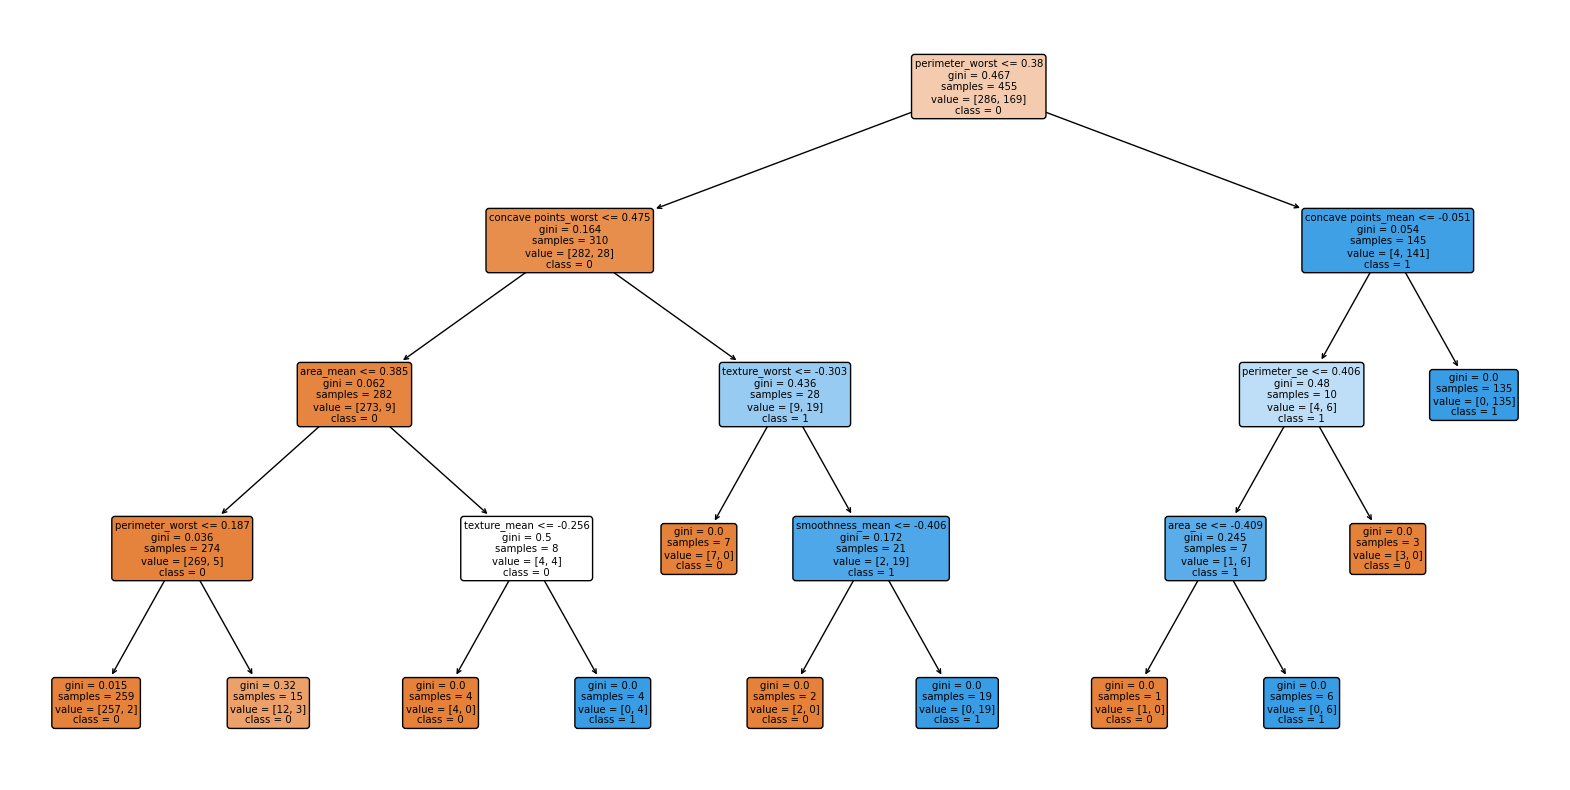

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.91      0.99      0.95        71
   Malignant       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Roc auc score (AUC): 0.9135276776940714
Mean average precision score (mAP): 0.8899952584163111


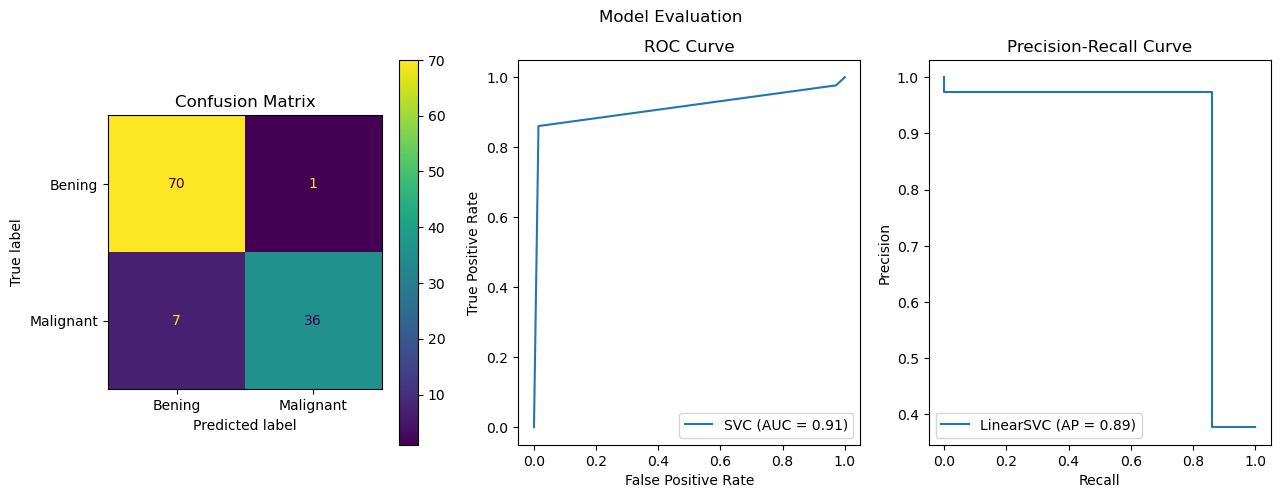

Decision Tree -  depth 5
Accuracy score: 0.9298245614035088


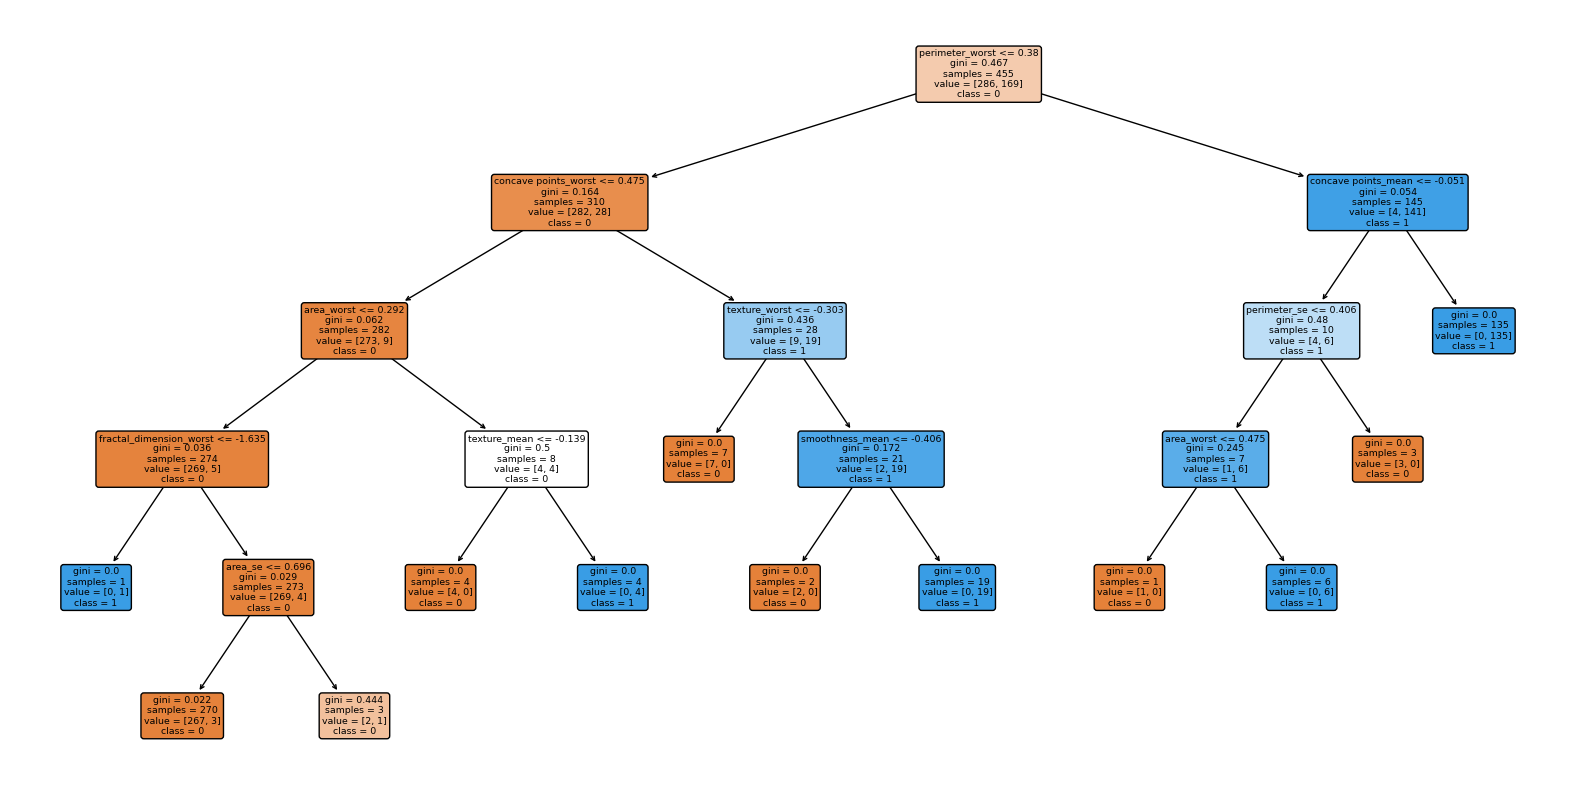

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.91      0.99      0.95        71
   Malignant       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Roc auc score (AUC): 0.9002620373403212
Mean average precision score (mAP): 0.8756795351042598


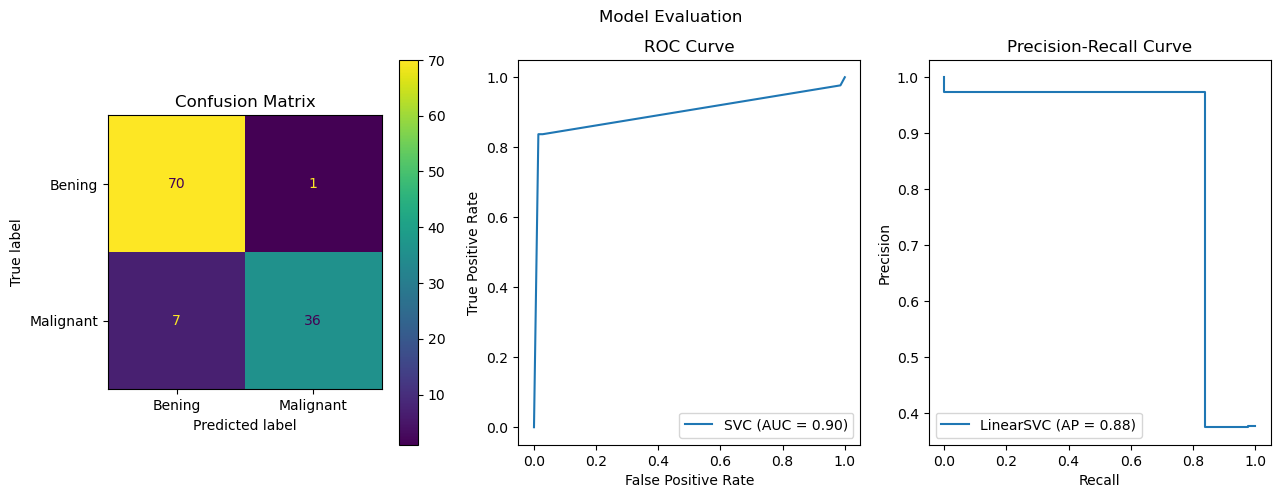

Decision Tree -  depth 6
Accuracy score: 0.9298245614035088


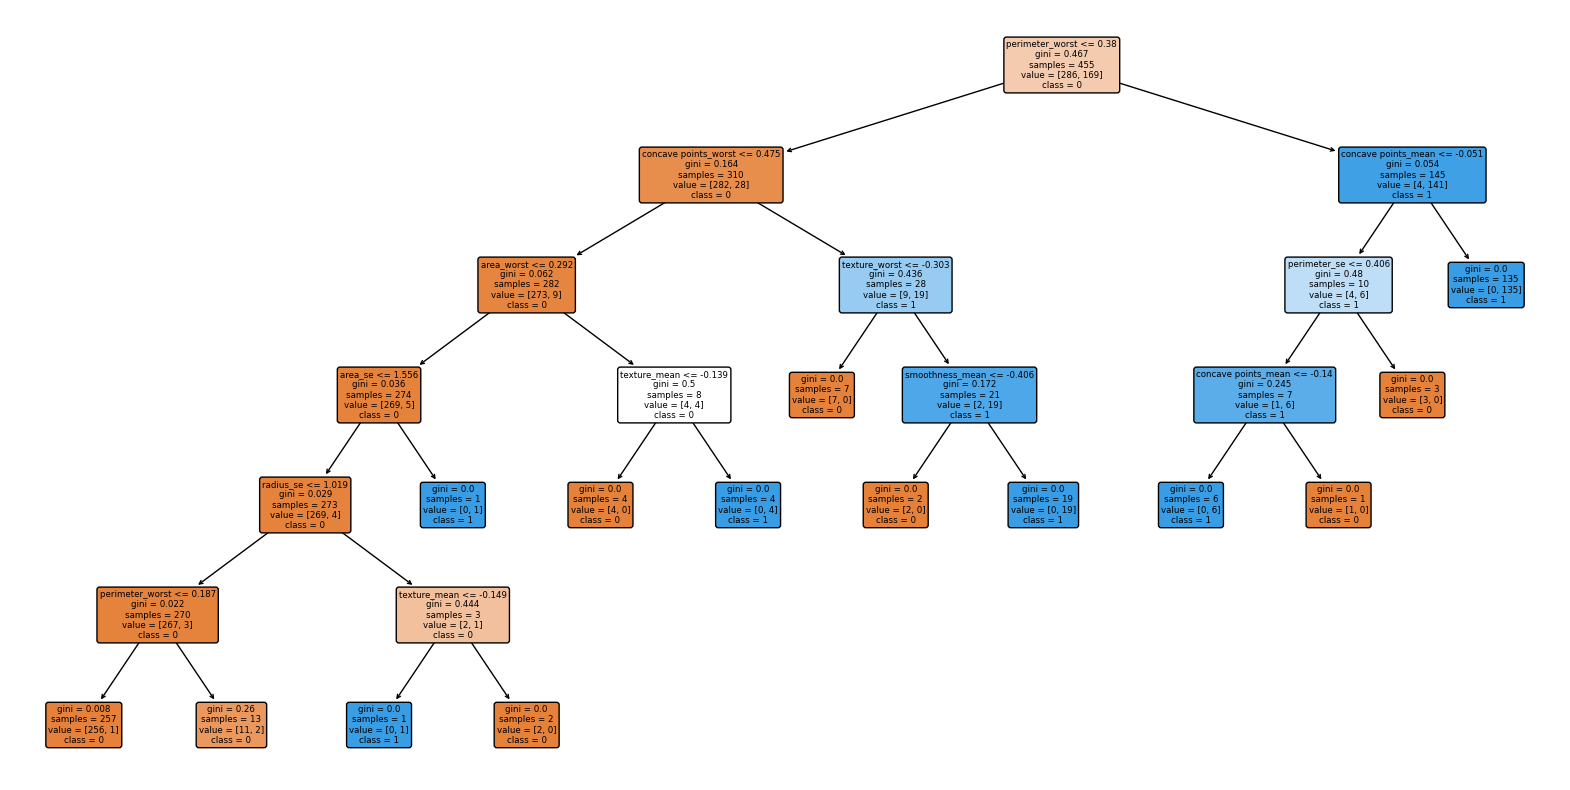

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.91      0.99      0.95        71
   Malignant       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Roc auc score (AUC): 0.9125450376678677
Mean average precision score (mAP): 0.8894146476765816


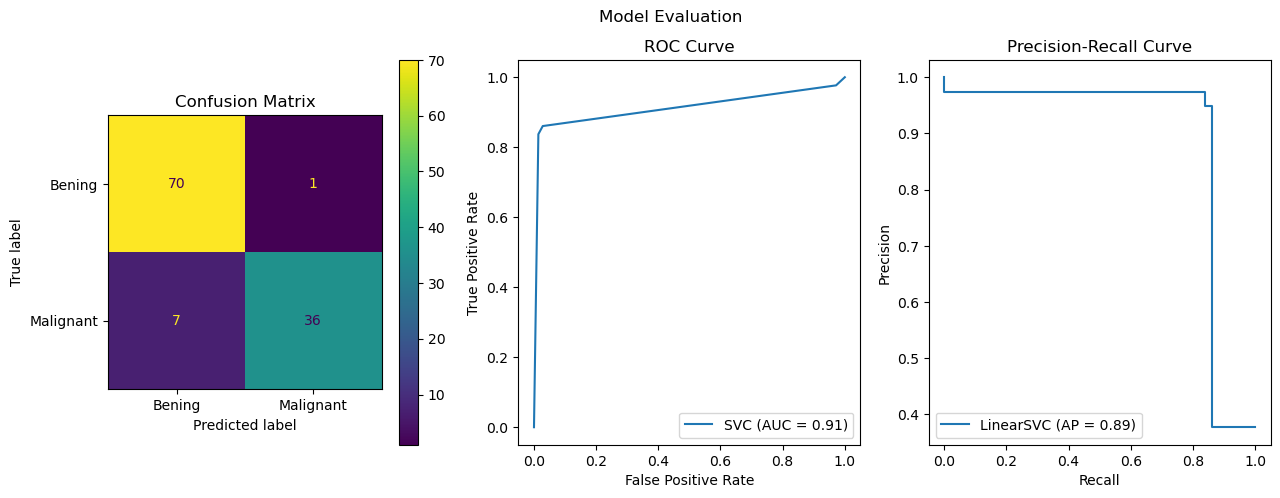

Decision Tree -  depth 7
Accuracy score: 0.9385964912280702


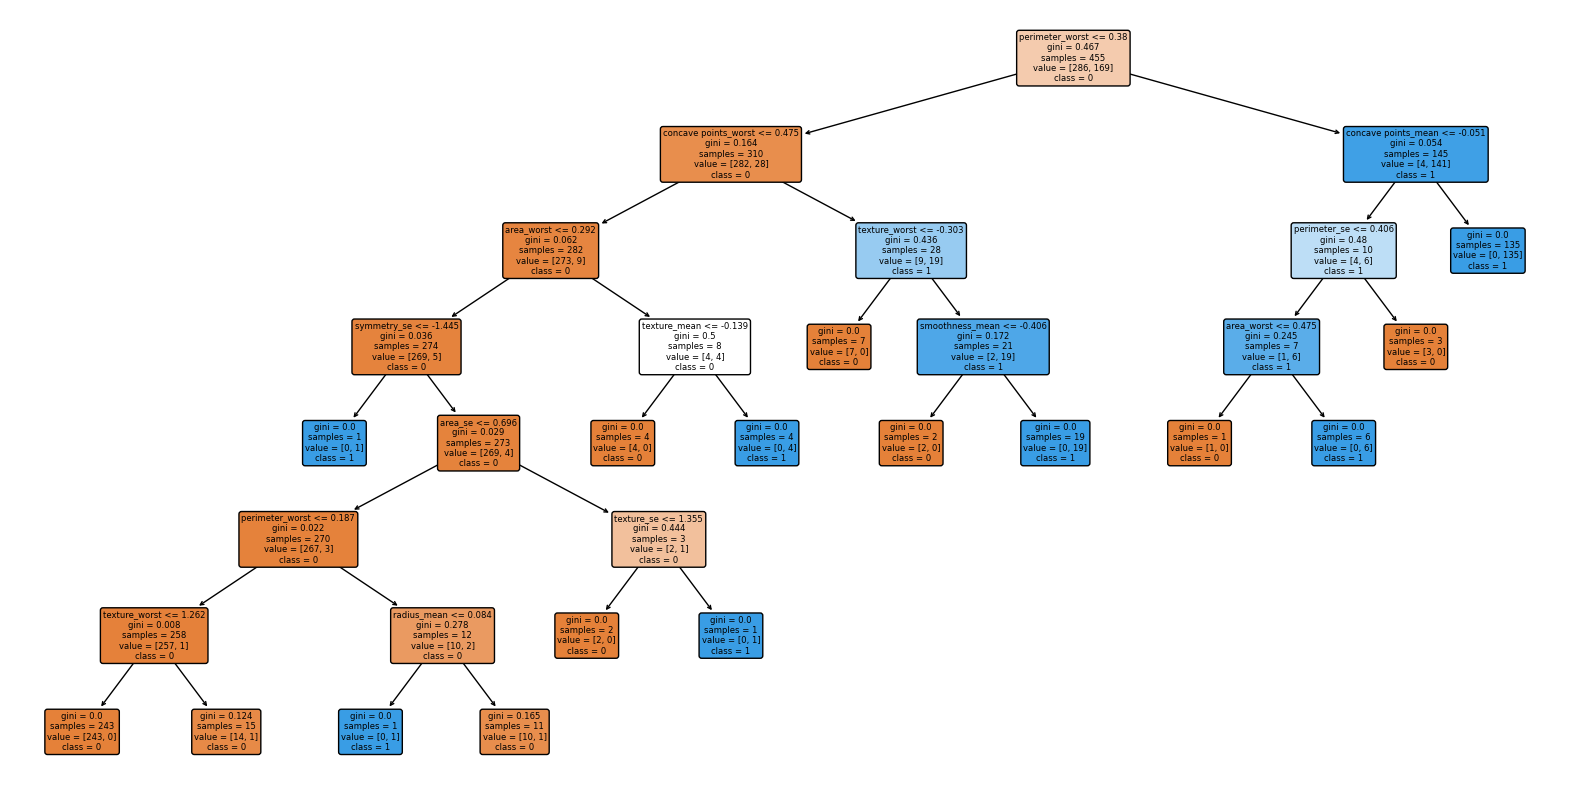

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.92      0.99      0.95        71
   Malignant       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Roc auc score (AUC): 0.9398951850638716
Mean average precision score (mAP): 0.912342788214216


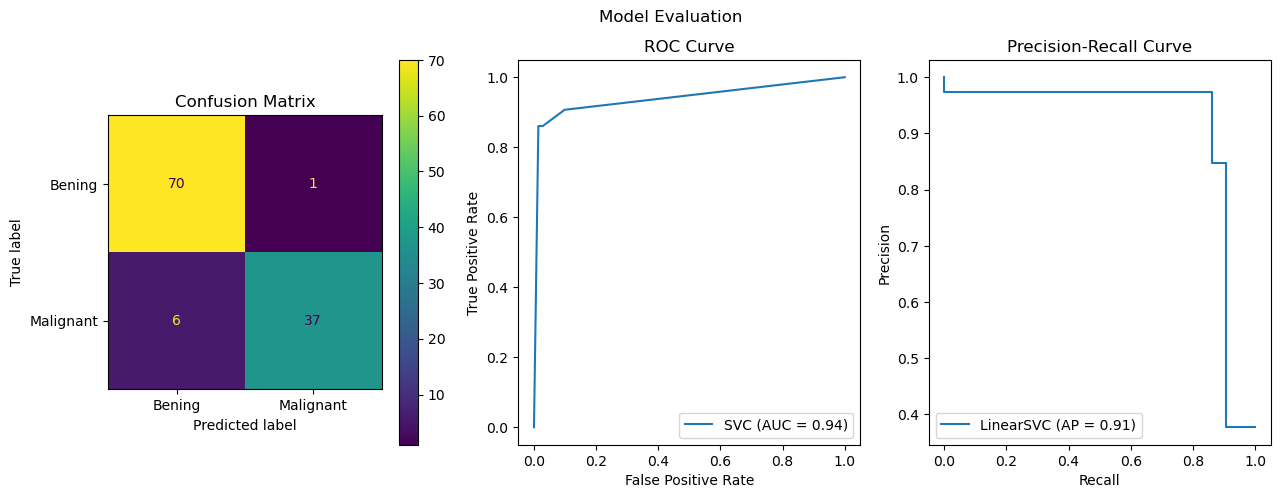

Decision Tree -  depth 8
Accuracy score: 0.9210526315789473


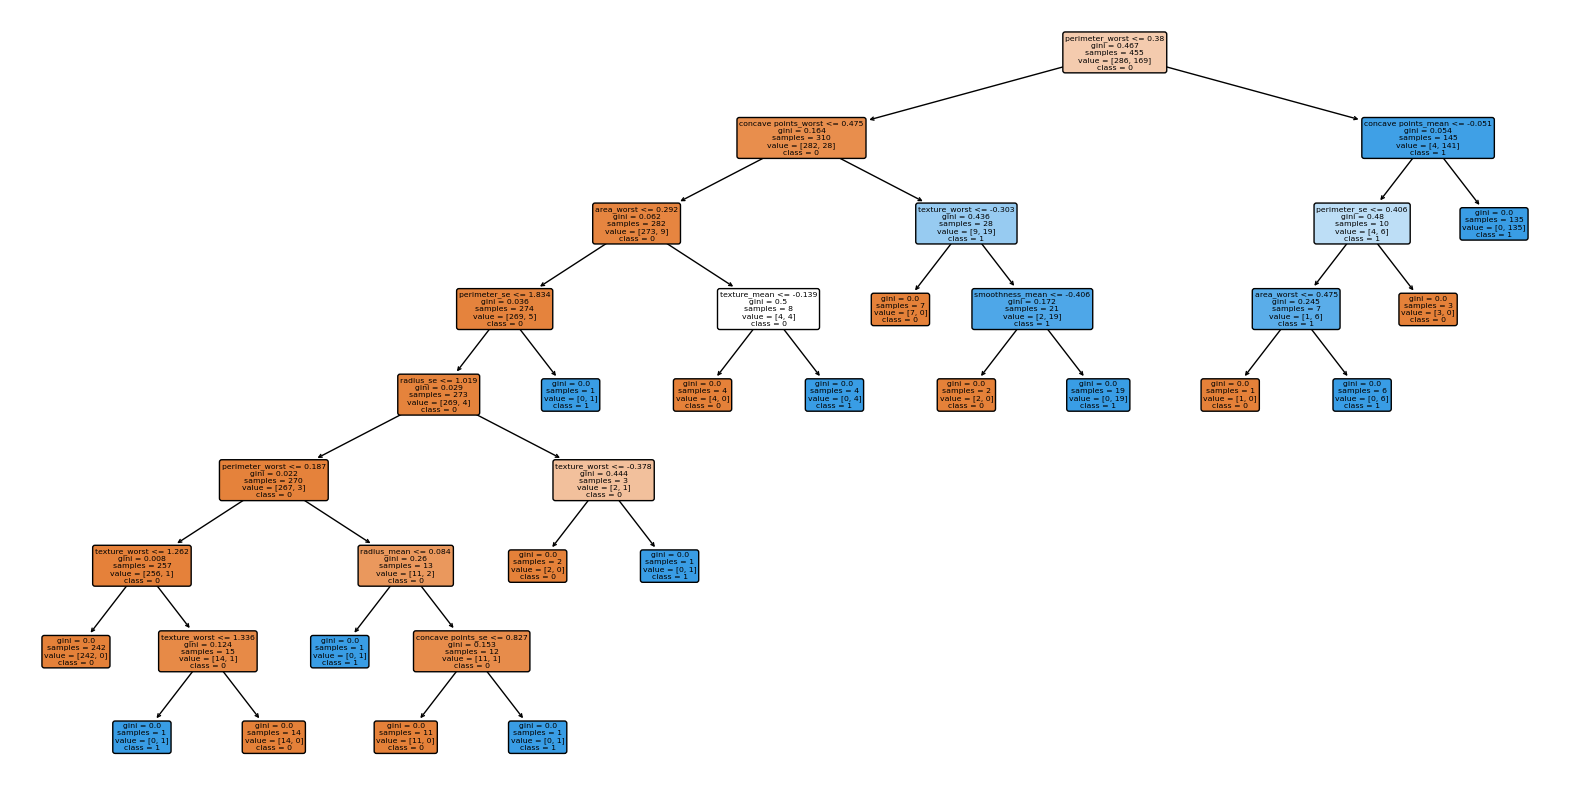

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.92      0.96      0.94        71
   Malignant       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Roc auc score (AUC): 0.9091057975761546
Mean average precision score (mAP): 0.848561811505508


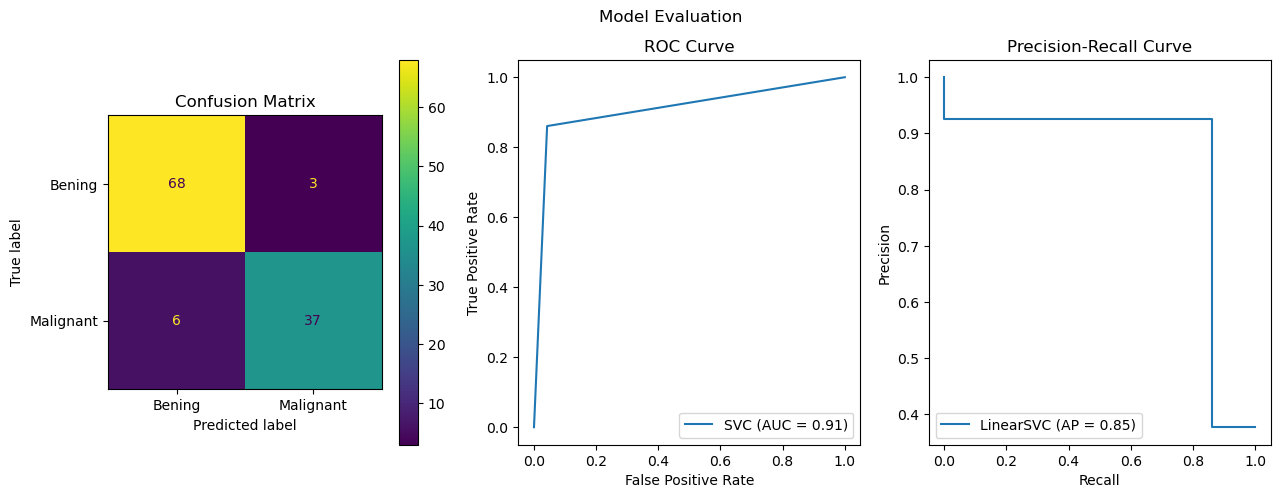

Decision Tree -  depth 9
Accuracy score: 0.9298245614035088


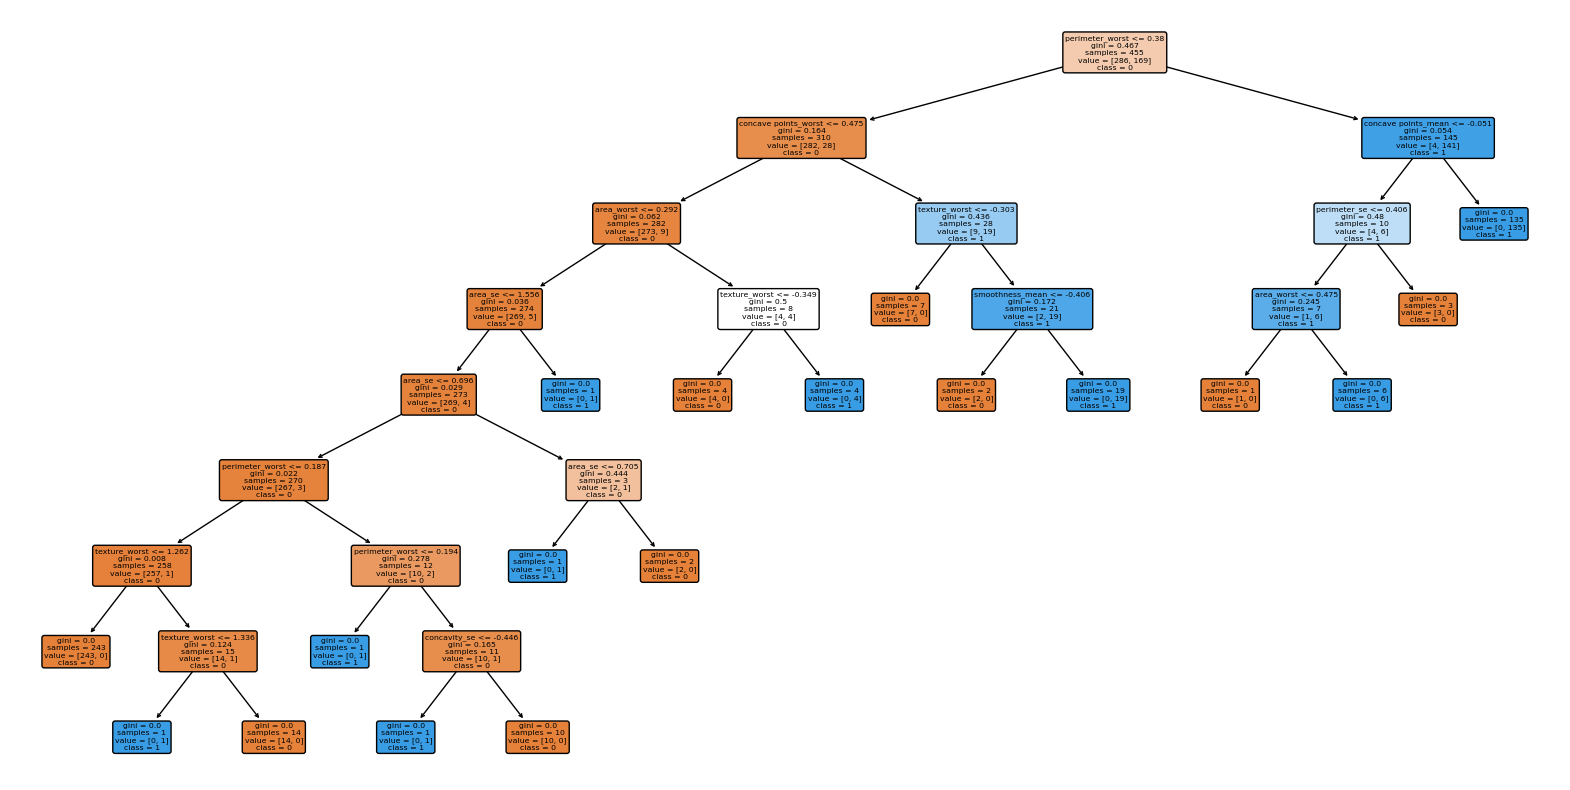

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.92      0.97      0.95        71
   Malignant       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Roc auc score (AUC): 0.9161480510972814
Mean average precision score (mAP): 0.8689702790069987


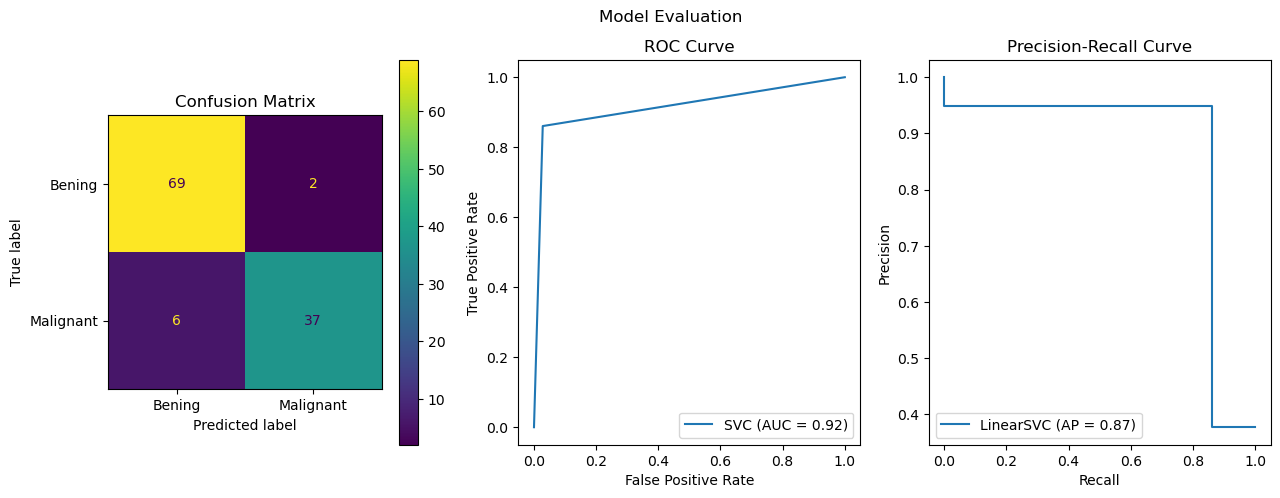

Decision Tree -  depth 10
Accuracy score: 0.9210526315789473


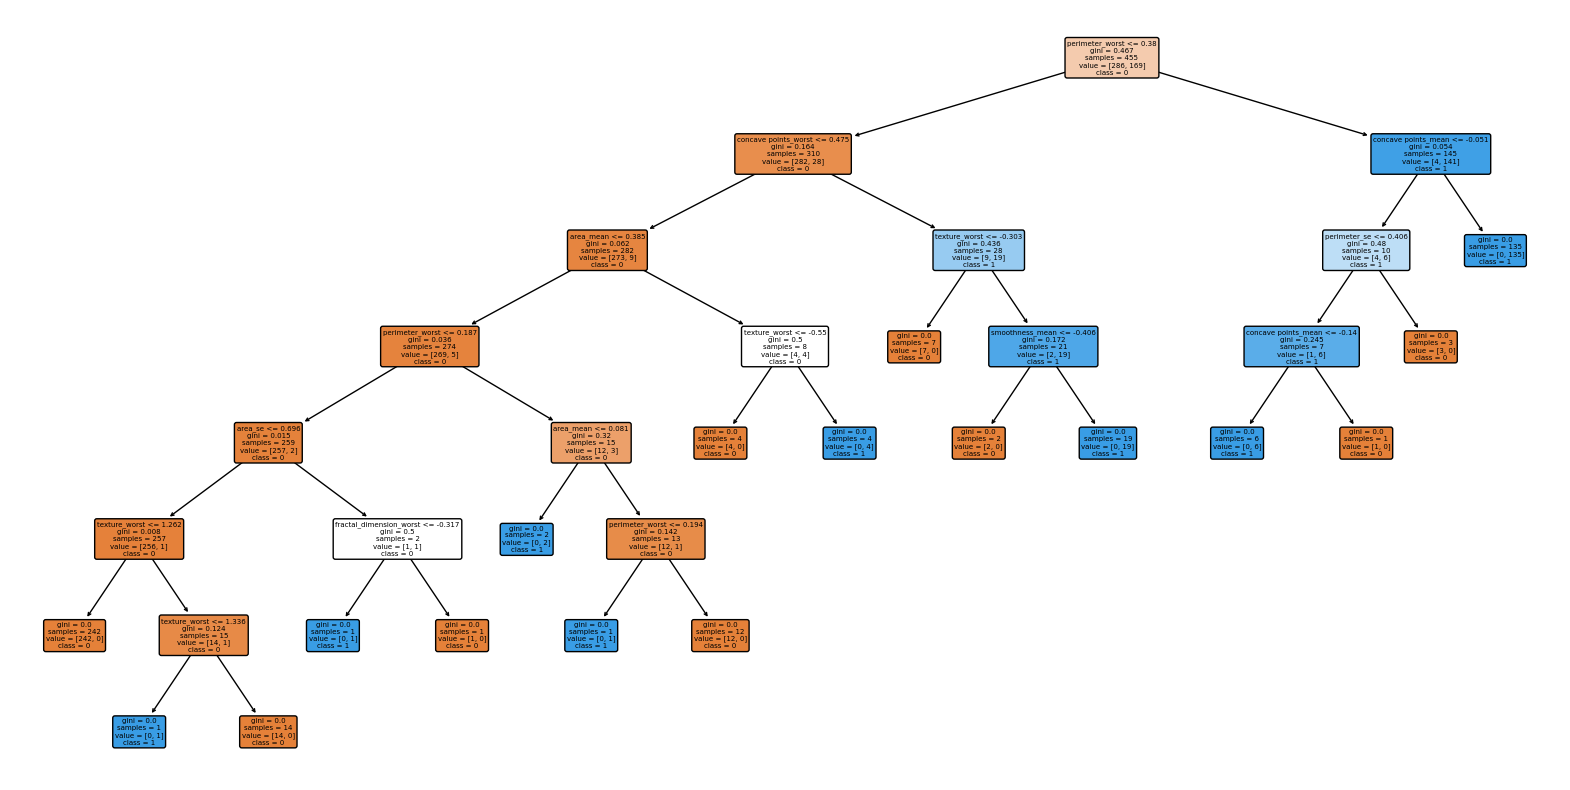

Classifiaction report - Test data
              precision    recall  f1-score   support

      Bening       0.92      0.96      0.94        71
   Malignant       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Roc auc score (AUC): 0.9091057975761546
Mean average precision score (mAP): 0.848561811505508


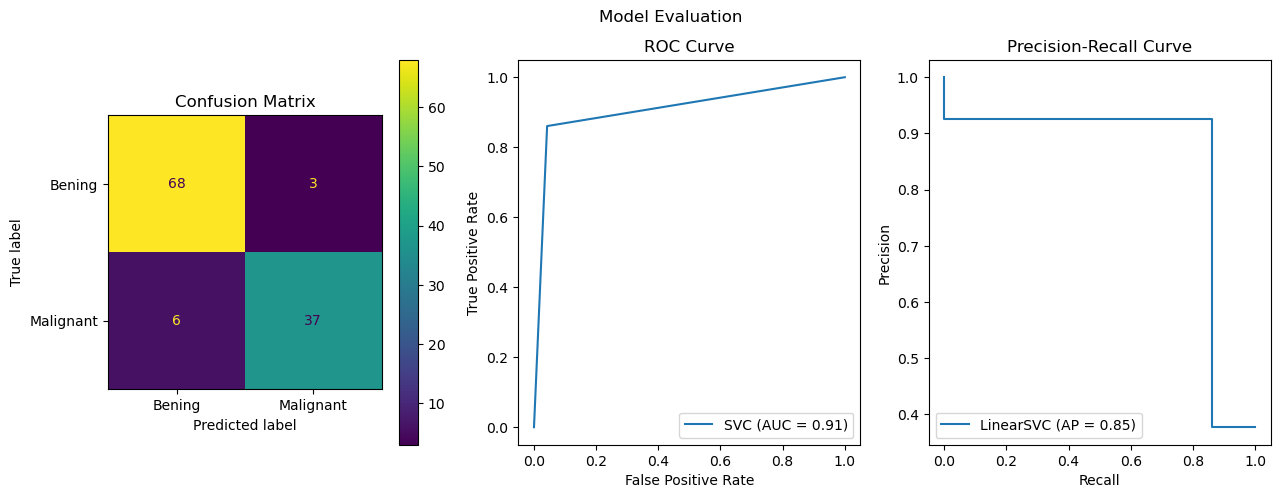

In [23]:
# Loop to apply the different models defined on the 'classifiers' variable, as 
# well as plotting the resuting tree and the evaution metrics of the modeling. 

for name, clf in zip(names, classifiers):

    # make pipeline to scale and fit the datasets
    clf = Pipeline([('scaler', StandardScaler()),('tree',clf)])
    clf.fit(X_train, y_train)

    # Predict the labels for X test dataset
    y_pred = clf.predict(X_test)

    # getting the accuracy score
    score = clf.score(X_test, y_test)

    # Predict class probabilities of the positive class in the input X
    y_score = clf.predict_proba(X_test)[:, 1]

    # Printing model name and accuracy score
    print(name) 
    print('Accuracy score:', score)

    # Plotting the tree
    tree_graph(clf.named_steps['tree'])
    
    # Printing the model evaluation
    evaluation_results(y_test, y_pred, y_score)


#### Analysis
After looking at the trees and the evaluation results I can say that <span style="color:#8b0000">**the best model to classify the cancer data is Decision Tree -  depth 7. Model accuracy score: 0.9385964912280702.**</span>
  
I explain my with more detal my decision in the following paragraph:  

Comparing the evaluation values of all the model tested I found that the tree with deep 7 has equal or best scores than the other models. The 
**Precision of the malignant samples was 0.97** (equal or as high as other models presented). The model can identify that the patients suffer from cancer 97% of the times. Although the **recall** value is not that high for the cancer patients (**0.86**), the average **f1-score** is high **(accuracy 0.94)**. And the mean average precision score **(mAP): 0.912342788214216** (which is the mean of the maximun precisions at different recall values) is also high enough.  
The **Roc auc score (AUC): 0.9398951850638716** is high, according to the rule of the better the classifier, the ROC-AUC score closer to 1. The other models, have worse parameters in general.  
  
Even though the scores are not perfect, they are high enough to say that this model can classify is a patient has cancer or not base on their clincal traits. Specifically the **'Perimeter_worst'** (which is the **root node**) is the **first attribute to take into account when classifying a patient's cancer diagnosis**. Based on that, you can decide if it is better to move to the right ot left path of the tree, until you find a leaf node and finally classify your patient diagnosis.  
  
As we can see, almost, all the **leaf nodes** have a **gini equal or close to 0**. Which means that the leaf nodes are 'pure', so almost all the  training instances the model applied belong to the same class.  
   
In general Decision Tree -  depth 7 is a good model, although we have to take into account that the False negatives predictions it can predict are 6. That is, **that 6 persons have cancer, but the model predict that they do not**. But this value is equal or better than the other models tested. 


#### References
* My 'week_05.ipynb' notebook. 
* *GeÌ ron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.*

## 3. Naive Bayes 

During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

Roommate | shivers | running nose | headache | test result
--|--|--|--|--
1 | Y | N | No | Negative
2 | N | N | Mild | Negative
3 | Y | Y | No | Positive
4 | N | Y | No | Negative
5 | N | N | Heavy | Positive
6 | Y | N | No | Negative
7 | Y | Y | Mild | Positive

Explain why it is not useful to include the column 'Roommate' in a classification procedure.

Train a [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need [Pandas `get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.

If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher ($p=0.527$) for the Negative class than for the Positive class.




In [2]:
# Libraries
from sklearn.naive_bayes import CategoricalNB
import numpy as np
import pandas as pd

In [3]:
# Cretate the data frame
corona_df = pd.DataFrame({'Roommate': [1,2,3,4,5,6,7],
              'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
              'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
              'hedache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
              'test_result': ['Negative', 'Negative', 'Positive', 'Negative', 
                              'Positive', 'Negative', 'Positive']
})
corona_df

,Roommate,shivers,running nose,hedache,test_result
0,1,Y,N,No,Negative
1,2,N,N,Mild,Negative
2,3,Y,Y,No,Positive
3,4,N,Y,No,Negative
4,5,N,N,Heavy,Positive
5,6,Y,N,No,Negative
6,7,Y,Y,Mild,Positive


In [4]:
# Convert the categorical data into numerical variables
corona_df = pd.get_dummies(corona_df)
corona_df

,Roommate,shivers_N,shivers_Y,running nose_N,running nose_Y,hedache_Heavy,hedache_Mild,hedache_No,test_result_Negative,test_result_Positive
0,1,0,1,1,0,0,0,1,1,0
1,2,1,0,1,0,0,1,0,1,0
2,3,0,1,0,1,0,0,1,0,1
3,4,1,0,0,1,0,0,1,1,0
4,5,1,0,1,0,1,0,0,0,1
5,6,0,1,1,0,0,0,1,1,0
6,7,0,1,0,1,0,1,0,0,1


In [5]:
corona_df.columns


Index(['Roommate', 'shivers_N', 'shivers_Y', 'running nose_N',
       'running nose_Y', 'hedache_Heavy', 'hedache_Mild', 'hedache_No',
       'test_result_Negative', 'test_result_Positive'],
      dtype='object')

### Training a categorical Naive Bayes classifier

Test results -> classes\
Covid features -> data

It is not useful to include the column 'Roommate' in the classification procedure because its not relevant information to determine wheater the person had covid or not. In other words, the variable does not influence the covid result.

In [47]:
# Testing for positve result
X, y = corona_df.drop(
                      columns=['Roommate',
                      'test_result_Negative',
                      'test_result_Positive']
                    ), corona_df.test_result_Positive

# Applying the model
clf = CategoricalNB()
clf.fit(X, y)
# Predicting the if the roomante no. 5 has covid or not
y_predict = clf.predict(X[4:5])

# Probability of the prediction of 'test_result_Positive' of roomate number 5 
proba_pos = clf.predict_proba(X[4:5])
proba_pos

print('0 means negative result. 1 means positive result')
print('The prediction of a', y_predict, 'test has a probality of:', proba_pos[0, 0])



0 mean negative result. 1 means postive result
The prediction of a [0] test has a probality of: 0.5981410732469196


So the roomante no. 5 has a negative prediction of having covid. 

#### References
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html
https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes
